# 1. Decision tree

## 1.1. Getting data

In [2]:
from sklearn.datasets import load_iris
from collections import Counter

data, target = load_iris(return_X_y = True, as_frame = True)
print(data.info())
print(Counter(target))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
Counter({0: 50, 1: 50, 2: 50})


## 1.2. Tree learning

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0 )
cross_val_score(clf, data, target, cv=10)


array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [4]:
clf.fit(data,target)

DecisionTreeClassifier(random_state=0)

In [5]:
clf.get_depth()

5

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
depth_uptimize = clf.get_depth()

In [8]:
parameters = { 'max_depth':range(2, depth_uptimize + 1  )}

In [9]:
parameters

{'max_depth': range(2, 6)}

In [10]:
clf_GridSearchCV = GridSearchCV(clf, parameters)

In [11]:
clf_GridSearchCV

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 6)})

In [12]:
clf_GridSearchCV.fit(data,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 6)})

In [13]:
clf_GridSearchCV.best_params_

{'max_depth': 4}

## 1.3. Visualizing the tree

In [14]:
clf = clf_GridSearchCV.best_estimator_
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(target, clf.predict(data))

0.9933333333333333

In [16]:
from sklearn import tree

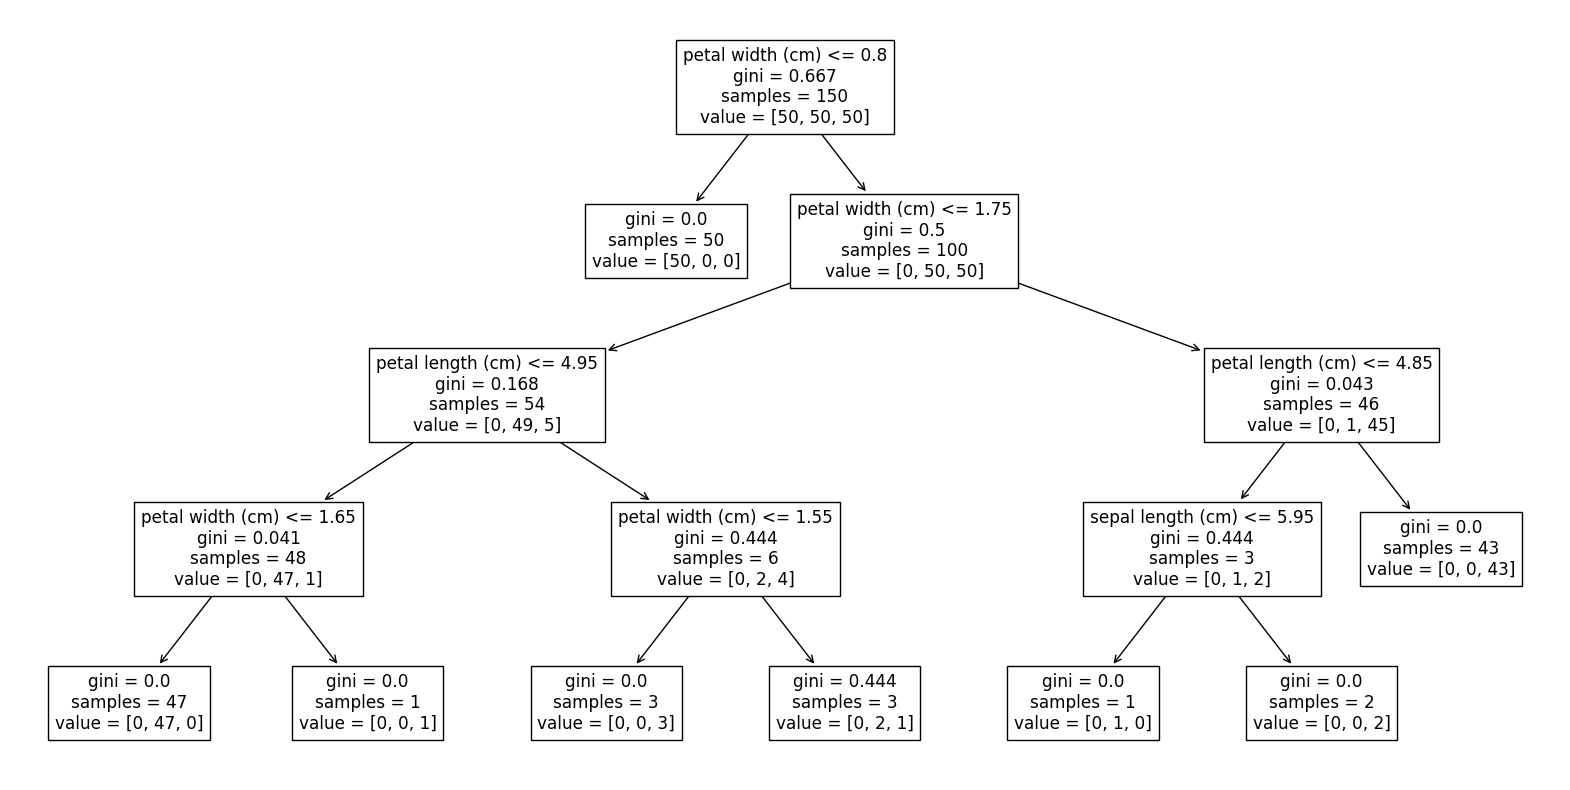

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf_GridSearchCV.best_estimator_,feature_names = data.columns )
plt.show()

In [18]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# 2. Datalog

In [19]:
pip install pydatalog

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 2.1. Creating terms

In [20]:
from pyDatalog import pyDatalog

pyDatalog.create_terms('X, Y')

## 2.2. Query

In [21]:
print(X==1)

X
-
1


## 2.3. Conjunction

In [22]:
print((X==1) & (Y==2))

X | Y
--|--
1 | 2


## 2.4. Functions

In [23]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
pyDatalog.create_terms('X, Y, petalWidth, label')

petalWidth['0'] = 0.2
print(petalWidth['0'] == X)

X  
---
0.2


## 2.5. Conditions

In [25]:
(label[X] == 1) <= (petalWidth[X] > 0)


label[1]==(*,X,'1') <= petalWidth[1]>(*,X,'0')

In [26]:
print(label['0'] == Y)

Y
-
1


# 3. Describing the Tree with Datalog

## 3.1. Creating terms

In [27]:
pyDatalog.create_terms('X, Y, sepalLength, sepalWidth, petalWidth, petalLength, label')

## 3.2. Rules

In [28]:
petalWidth['first'] = 0.5
petalWidth['second'] = 1
petalLength['second'] = 2

(label[X] == 0) <= (petalWidth[X] <= 0.8)
(label[X] == 1) <= ((petalWidth[X] > 0.8) & (petalWidth[X] <= 1.75) & (petalLength[X] <= 4.95) & (petalWidth[X] <= 1.65))
print(label['second'] == Y)

(label[X] == 2) <= ((petalWidth[X] > 0.8) & (petalWidth[X] <= 1.75) & (petalLength[X] <= 4.95) & (petalWidth[X] > 1.65))
petalLength['third'] = 4
petalWidth['third'] = 1.7
print(label['third'] == Y)

Y
-
1
Y
-
2


## 3.2. Facts

## 3.3. Query

# 4. Dynamic clauses generation